# Support Vector Machines

¡Bienvenido a su proyecto de máquina de vectores de soporte! Simplemente las instreucciones del notebook. ¡Analizaremos el famoso conjunto de datos de iris!

## Los datos
Utilizaremos el famoso [conjunto de datos de flores de iris] (http://en.wikipedia.org/wiki/Iris_flower_data_set).

El conjunto de datos de la flor Iris o el conjunto de datos Iris de Fisher es un conjunto de datos multivariado introducido por Sir Ronald Fisher en 1936 como un ejemplo de análisis discriminante.

El conjunto de datos consta de 50 muestras de cada una de las tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor), por lo que contiene 150 muestras en total. Se midieron cuatro características de cada muestra: la longitud y el ancho de los sépalos y pétalos, en centímetros.

Aquí hay una imagen de los tres tipos diferentes de Iris:

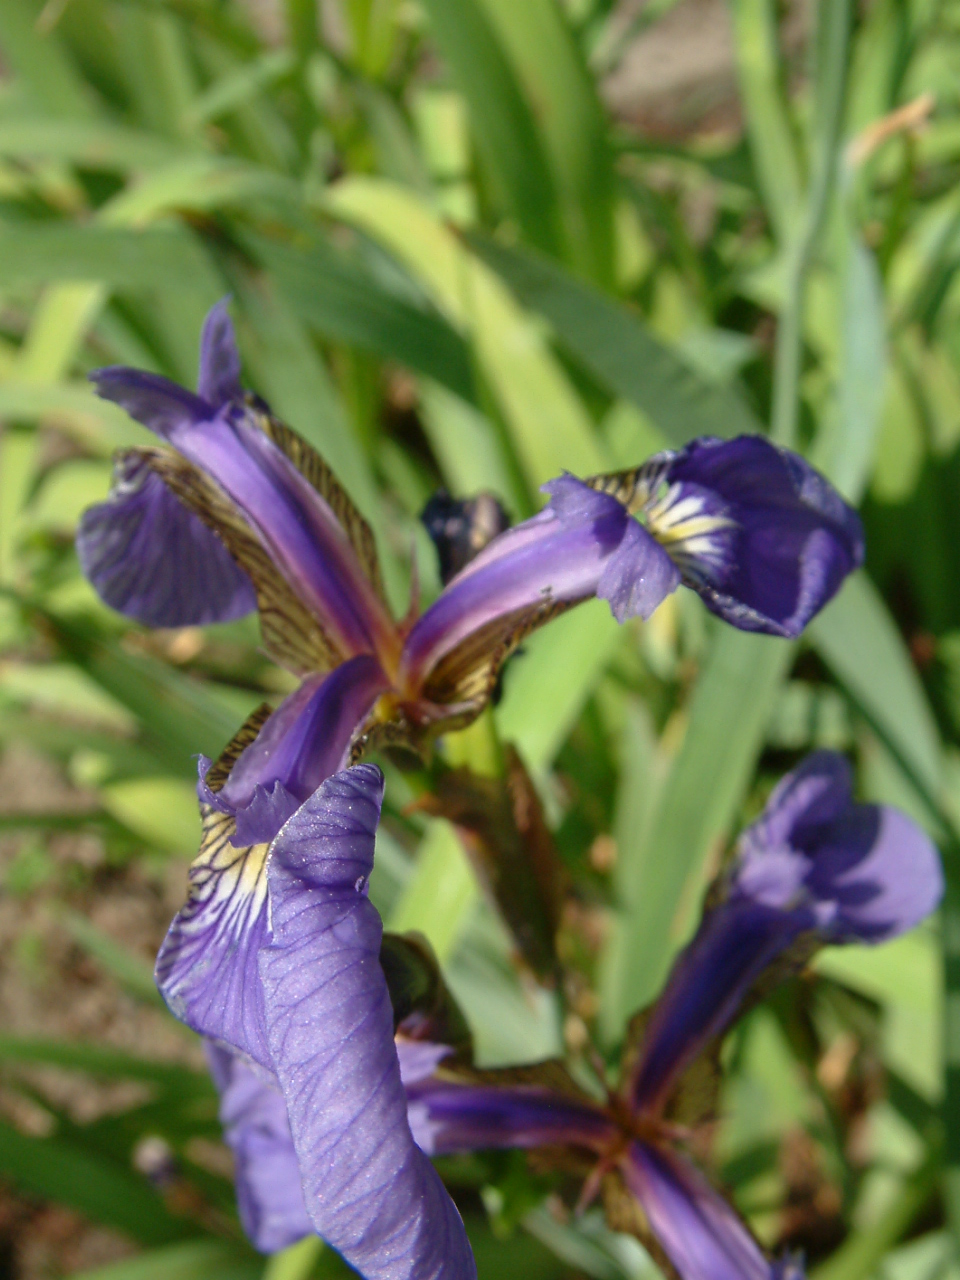

In [1]:
# The Iris Setosa
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg'
Image(url,width=300, height=300)

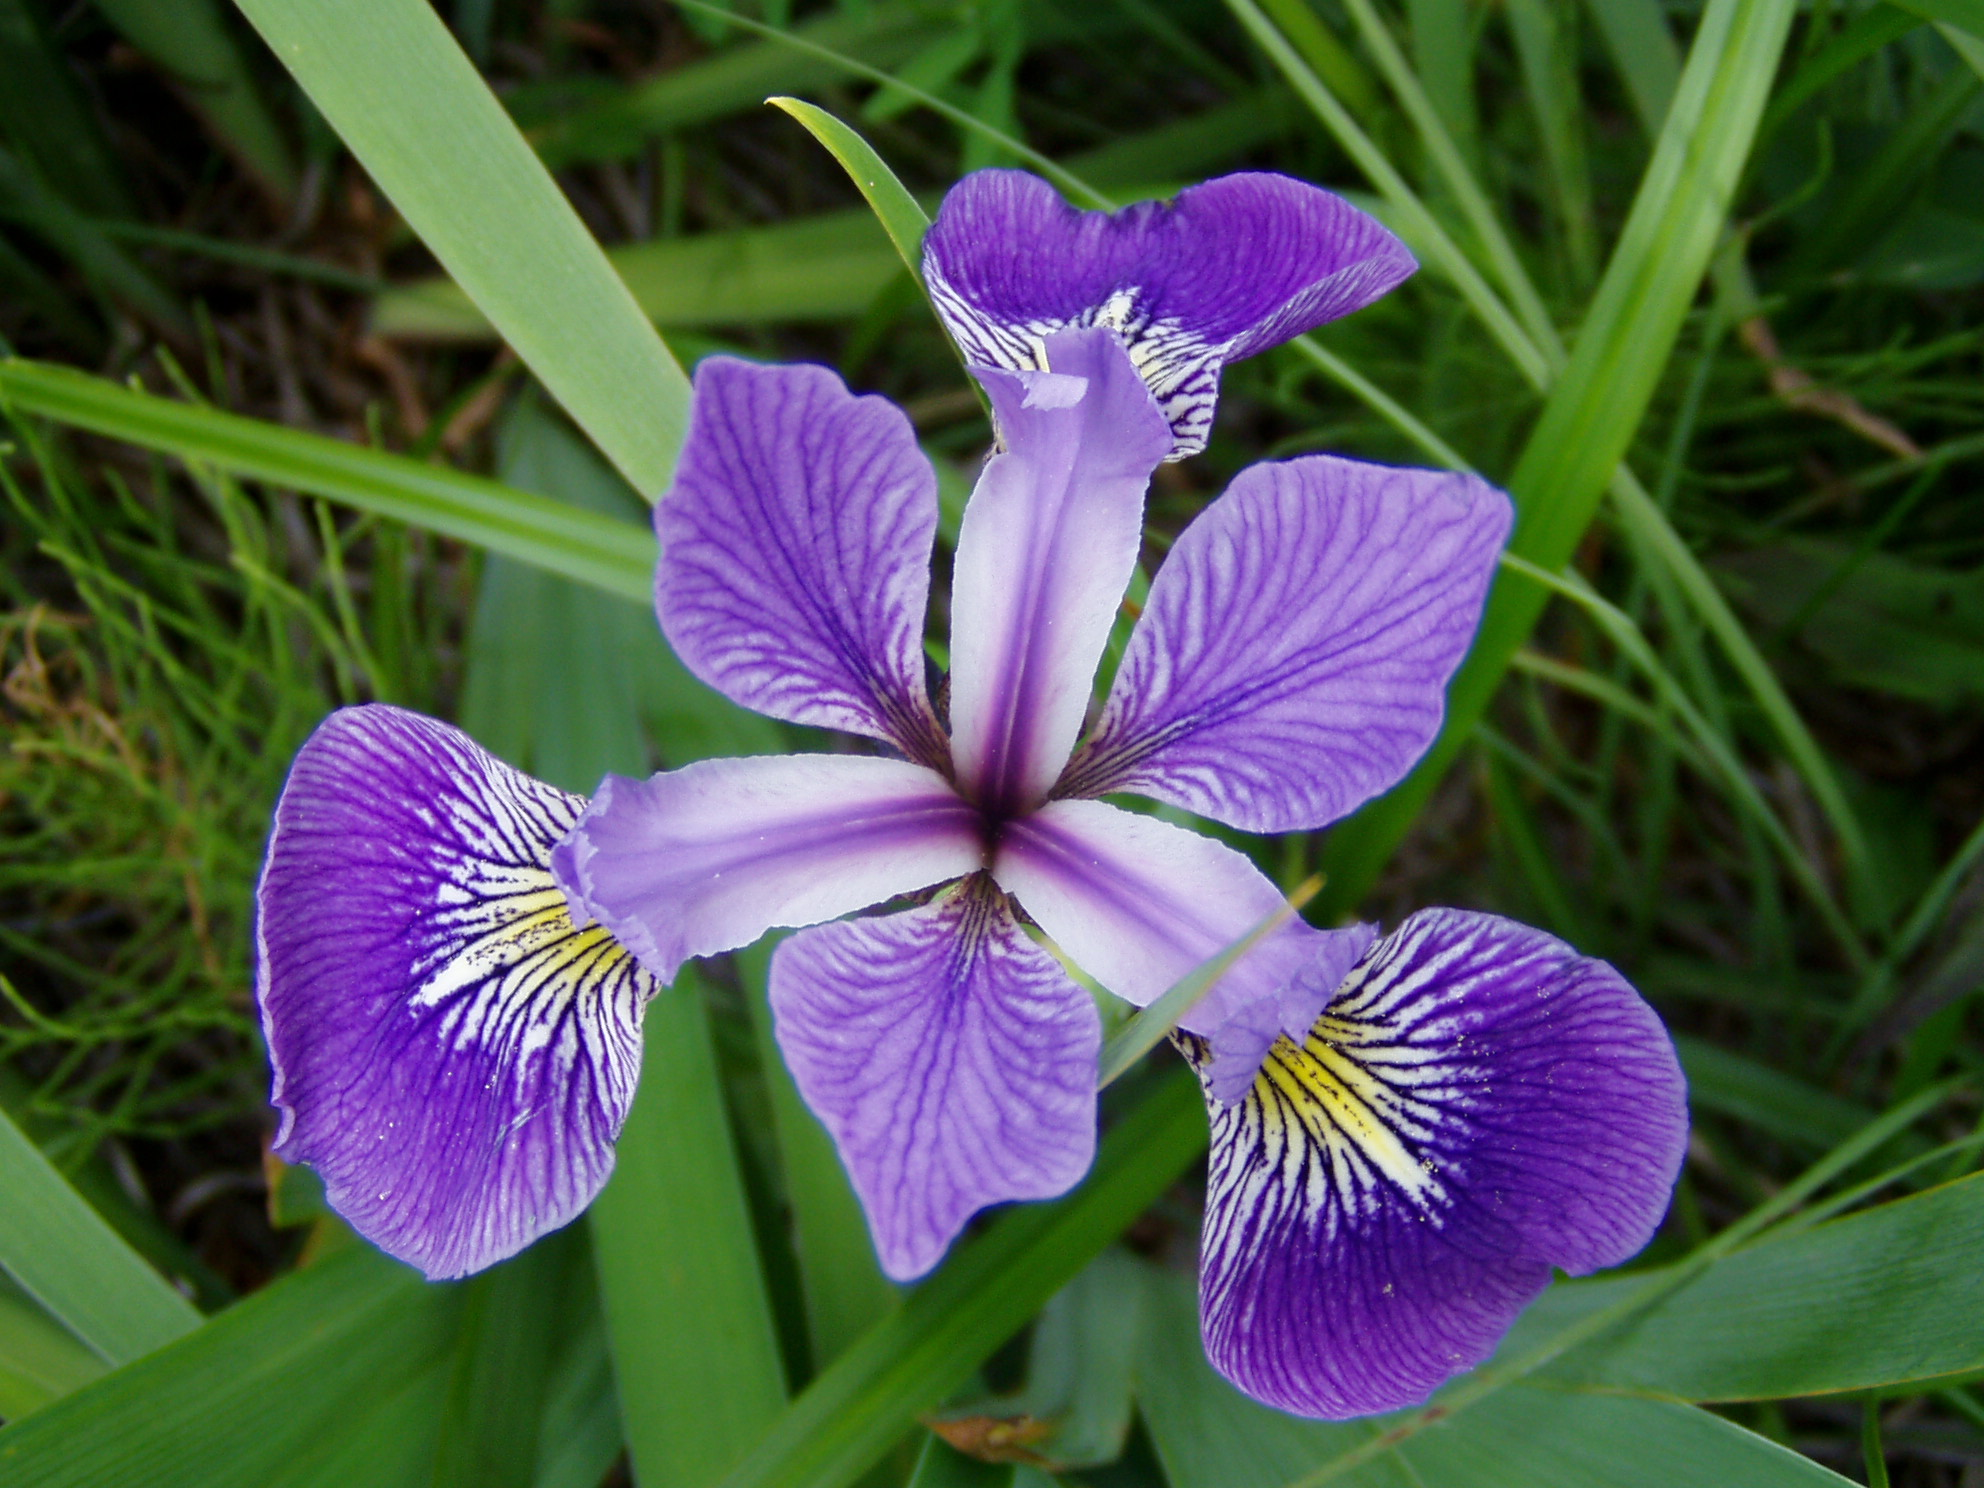

In [2]:
# The Iris Versicolor
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg'
Image(url,width=300, height=300)

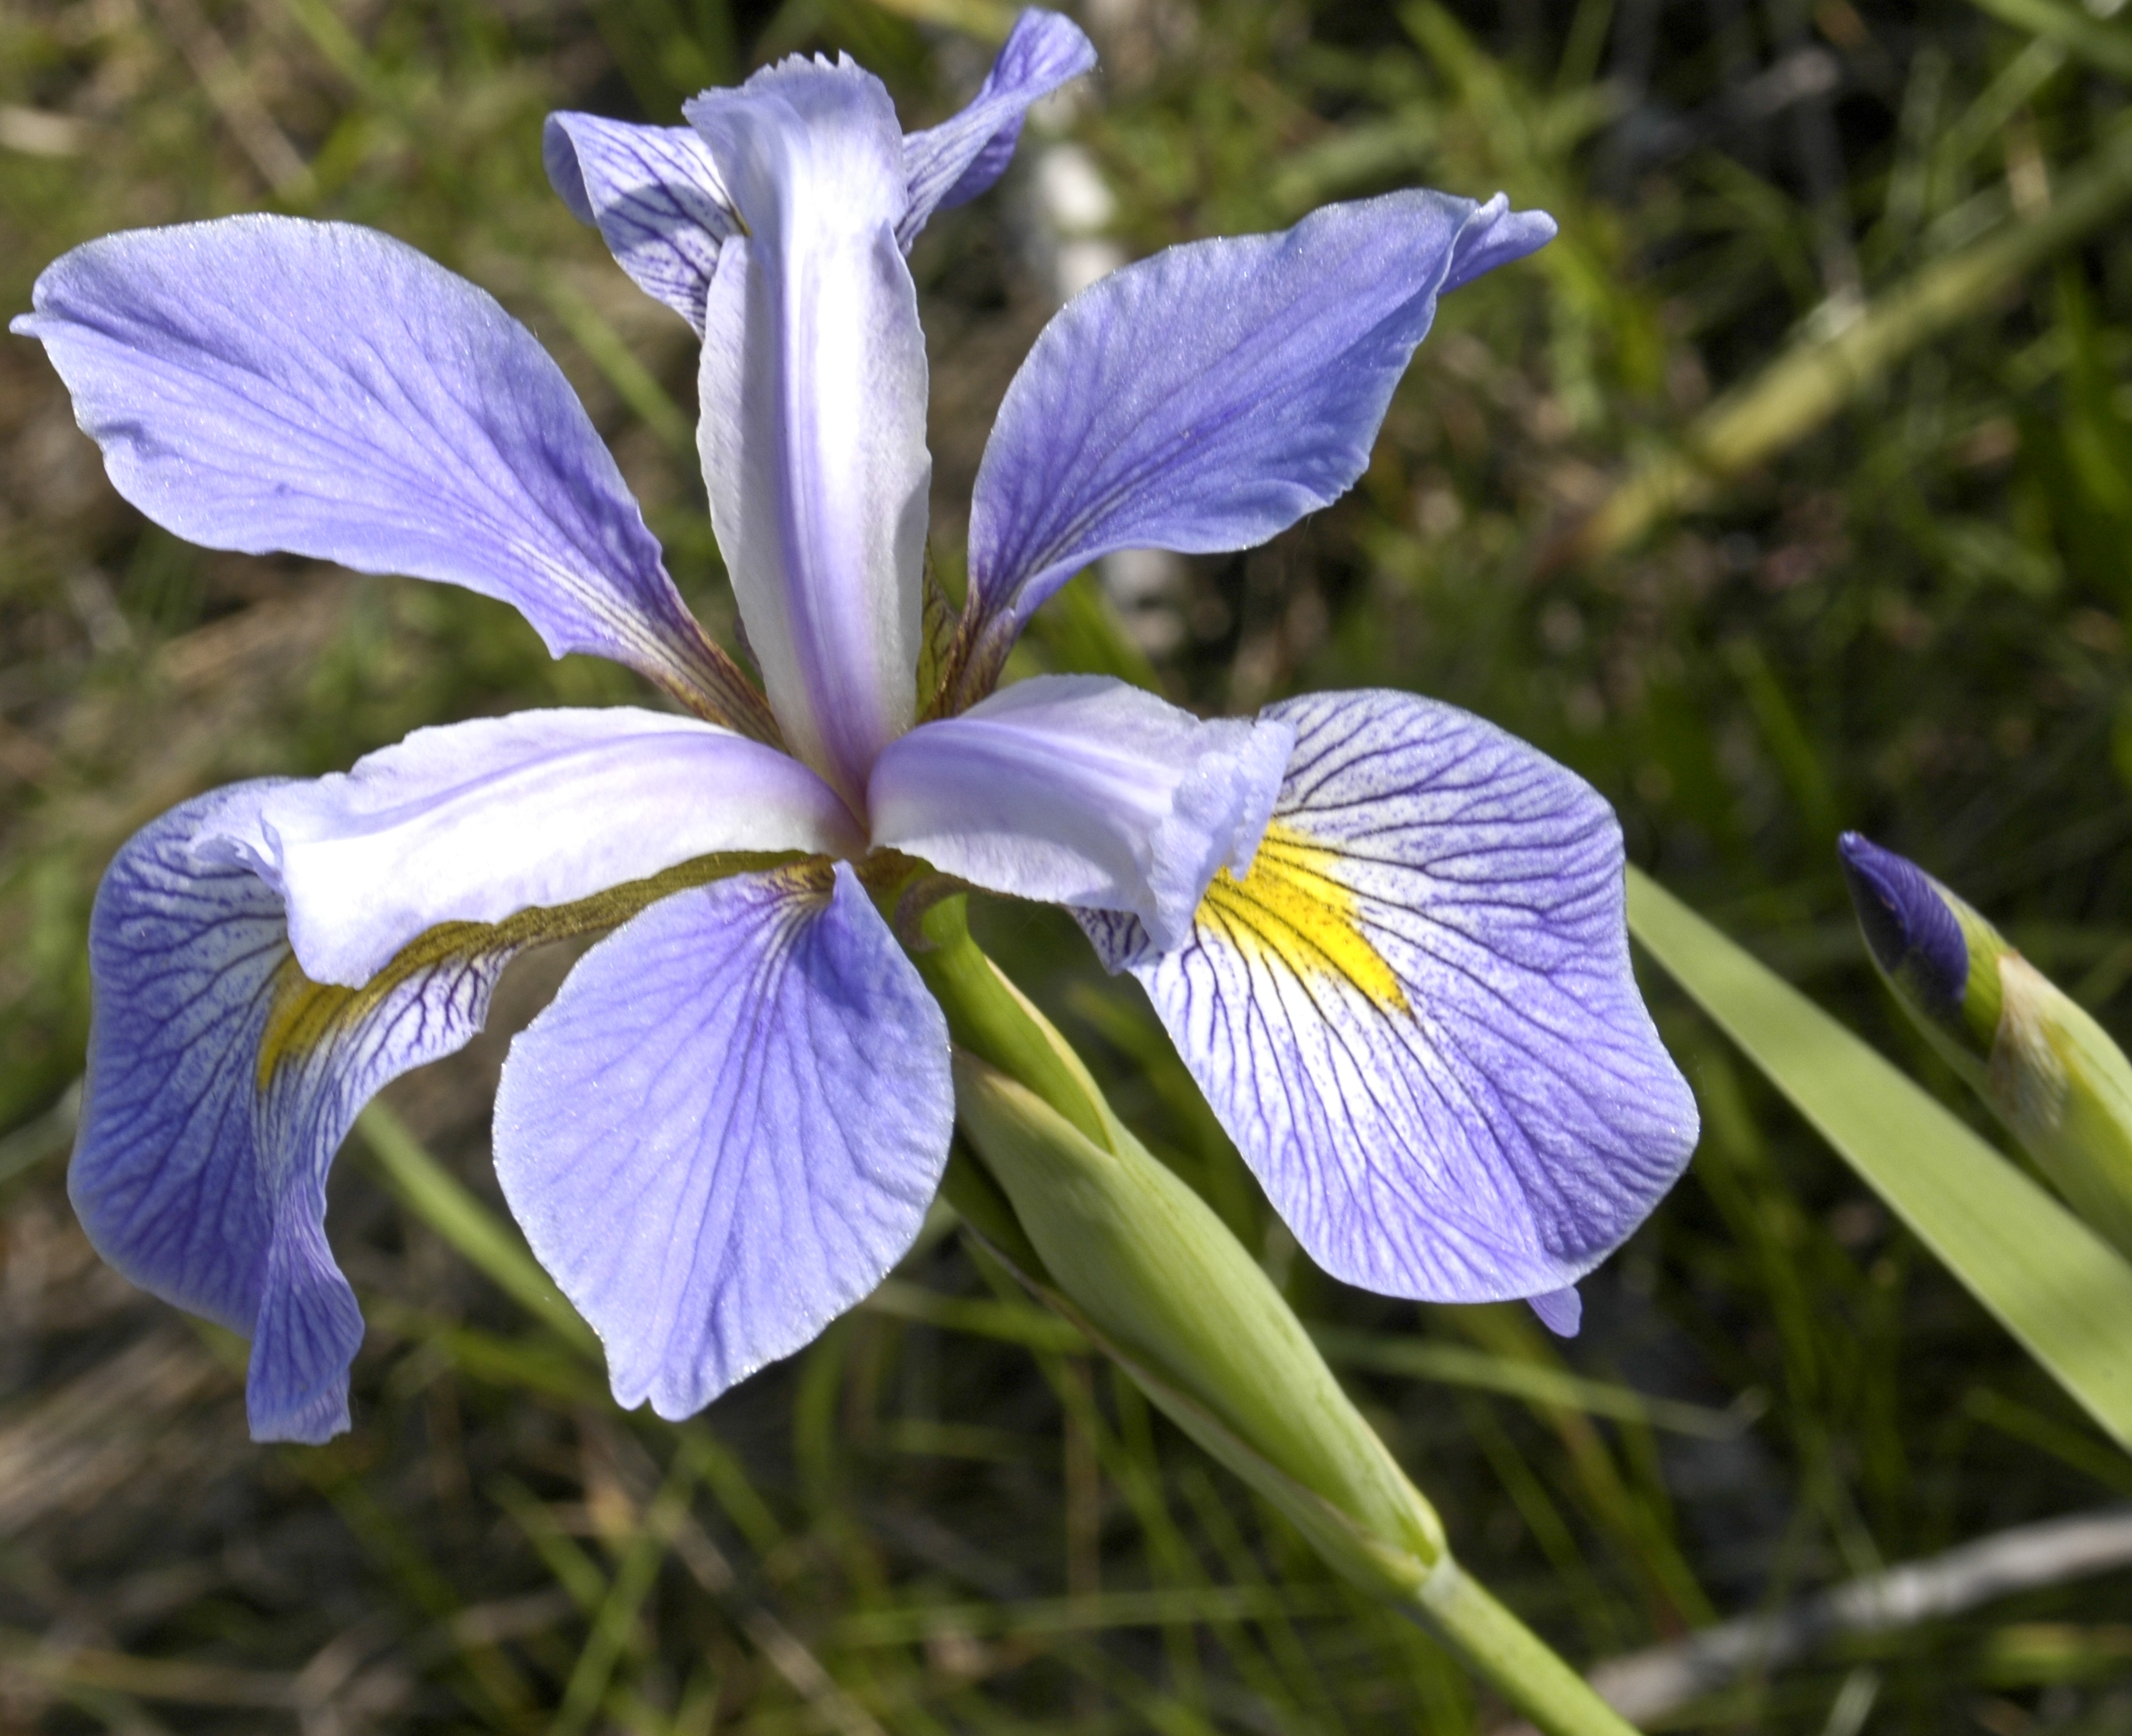

In [3]:
# The Iris Virginica
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg'
Image(url,width=300, height=300)

El conjunto de datos del iris contiene medidas para 150 flores de iris de tres especies diferentes.

Las tres clases en el conjunto de datos de Iris:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)


Las cuatro características del conjunto de datos de Iris:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Carga los datos

**Usa seaborn para obtener los datos: iris = sns.load_dataset('iris') y usa describe() para ver sus características**

In [4]:
#Importa los datos
import seaborn as sns
iris = sns.load_dataset('iris')

In [5]:
#Revisa las características de los datos
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Visualicemos los datos y comencemos!

## EDA
¡Es hora de poner a prueba tus habilidades de visualización de datos! Intenta recrear las siguientes gráficas; asegúrate de importar las bibliotecas que necesitarás.

**Importa algunas librerías que crees que necesitarás.**

In [7]:
#Importa las librerías
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Crear un gráfico del conjunto de datos. ¿Qué especie de flor parece ser la más separable?**

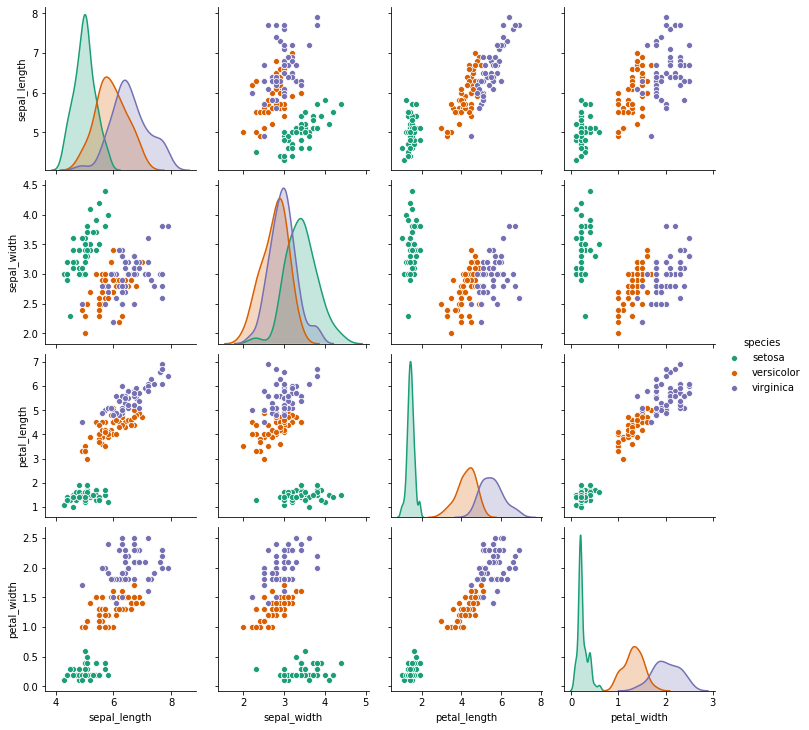

In [8]:
# Setosa es la mas separable. 
sns.pairplot(iris,hue='species',palette='Dark2')

**Crea un gráfico kde de "sepal_length" vs. "sepal_width" para la especie de flores setosa.**

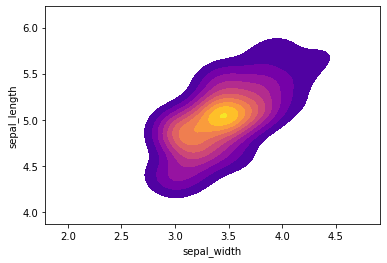

In [9]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot( setosa['sepal_width'], setosa['sepal_length'],
                 cmap="plasma", shade=True, shade_lowest=False)

# Dividir los datos en entrenamiento y pruebas



In [10]:
#Importa la librería
from sklearn.model_selection import train_test_split

In [11]:
#Crea las variables X & y. Separa los conjuntos de datos en entrenamiento y pruebas, con un test_size=0.30
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Entrenando el modelo

Ahora es el momento de entrenar un clasificador de máquina de vectores de soporte.

**Llama al modelo SVC () desde sklearn y ajuste el modelo a los datos de entrenamiento.**

In [12]:
#Importa la librería
from sklearn.svm import SVC

In [13]:
#Genera el modelo
svc_model = SVC()

In [14]:
#Entrena el modelo
svc_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Evaluación del modelo
**Ahora obten las predicciones del modelo y crea una matriz de confusión y un informe de clasificación.**

In [15]:
#Genera las predicciones
predictions = svc_model.predict(X_test)

In [16]:
#Importa la librería
from sklearn.metrics import classification_report,confusion_matrix

In [17]:
#Muestra la matriz de confusión
print(confusion_matrix(y_test,predictions))

[[12  0  0]
 [ 0 13  1]
 [ 0  3 16]]


In [18]:
#Muestra el informa de clasificación
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.81      0.93      0.87        14
   virginica       0.94      0.84      0.89        19

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.92      0.91      0.91        45



¡Guauu! ¡Deberías haber notado que tu modelo era bastante bueno! Veamos si podemos ajustar los parámetros para tratar de mejorar aún más (poco probable, y es probable que estés satisfecho con estos resultados de manera real, ya que el conjunto de datos es bastante pequeño, pero solo quiero que practiques el uso de GridSearch.

## Gridsearch

**Importa GridsearchCV de SciKit Learn.**

In [19]:
from sklearn.model_selection import GridSearchCV

**Crea un diccionario llamado param_grid y fija algunos valores para C y gamma.**

In [20]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

**Crea un objeto GridSearchCV y ajústalo a los datos de entrenamiento.**

In [21]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

**Ahora toma ese modelo del grid y crea algunas predicciones usando el conjunto de prueba y crea informes de clasificación y matrices de confusión para ellos. ¿Pudiste mejorar?**

In [22]:
#Crea las predicciones
grid_predictions = grid.predict(X_test)

In [23]:
#Imprime la matriz de confusión
print(confusion_matrix(y_test,grid_predictions))

[[12  0  0]
 [ 0 13  1]
 [ 0  3 16]]


In [24]:
#Imprime el informe de clasificación
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.81      0.93      0.87        14
   virginica       0.94      0.84      0.89        19

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.92      0.91      0.91        45



Deberías haber hecho más o menos lo mismo. Esto tiene sentido, básicamente solo hay un punto que es demasiado ruidoso para predecir, lo que tiene sentido. No queremos tener un modelo sobreajustado que pueda predecir eso.

## ¡Buen trabajo!